In [1]:
from IVClassification import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

## Model
let $g(p) = \ln\left( \frac{p}{1-p} \right)$ be the logit function, $X$ be the treatment, $Y$ be the binary outcome, $U$ be the confounder, and $Z$ be the instrumental variable. The generalized linear model can be defined as:
$$
g(\mathbb{E}[Y|X, U])= \beta^{T}X + \eta U
$$
where
$$
\mathbb{E}[X^{T}U]\neq 0, \quad \mathbb{E}[Z^{T}U]=0
$$


Let the structrual equation be linear:
$$
X = \alpha Z + \gamma U + \epsilon
$$

### The effect of $\beta$

In [22]:
lg_dif = np.array([])
tslg_dif = np.array([])
s3lg_dif = np.array([])
gmm_dif = np.array([])
res_dif = np.array([])

para_range = np.linspace(0, 100, 100)

for beta in para_range:
    
    data = sim_data(n=10000, beta=beta)
    
    # data.X = StandardScaler().fit_transform(data.X.reshape(-1, 1)).reshape(-1)
    # data.Z = StandardScaler().fit_transform(data.Z.reshape(-1, 1)).reshape(-1)
    
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    
    lg_dif = np.append(lg_dif, np.abs(lg.coef_ - beta))
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_dif = np.append(tslg_dif, np.abs(tslg.coef_ - beta))
    
    s3lg = three_stage_logit()
    s3lg.fit(data.X, data.Y, data.Z)
    s3lg_dif = np.append(s3lg_dif, np.abs(s3lg.coef_ - beta))
    
    gmm = GMM_logit()
    gmm.fit(data.X, data.Y, data.Z)
    gmm_dif = np.append(gmm_dif, np.abs(gmm.coef_ - beta))
    
    res_model = residual_logit()
    res_model.fit(data.X, data.Y, data.Z)
    res_dif = np.append(res_dif, np.abs(res_model.beta - beta))



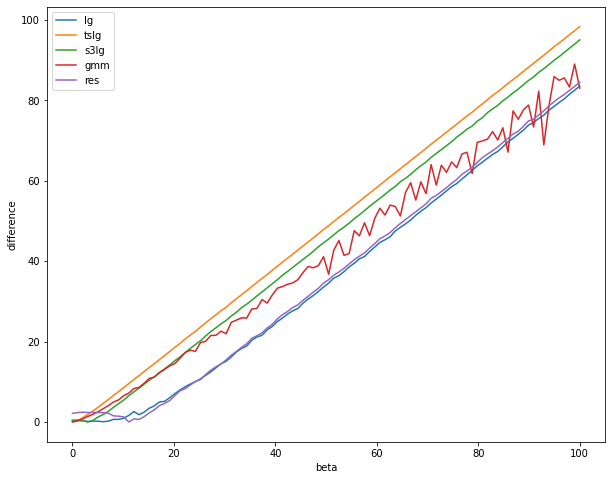

In [23]:
plt.figure(figsize=(10, 8))
plt.plot(para_range, lg_dif, label='lg')
plt.plot(para_range, tslg_dif, label='tslg')
plt.plot(para_range, s3lg_dif, label='s3lg')
plt.plot(para_range, gmm_dif, label='gmm')
plt.plot(para_range, res_dif, label='res')
plt.xlabel('beta')
plt.ylabel('difference')
plt.legend()

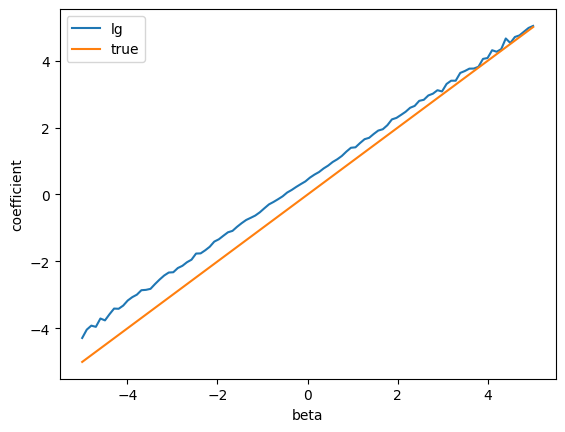

In [18]:
lg_coef = np.array([])

para_range = np.linspace(-5, 5, 100)

for beta in para_range:
    
    data = sim_data(n=10000, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    
    lg_coef = np.append(lg_coef, lg.coef_)
    
plt.plot(para_range, lg_coef, label='lg')
plt.plot(para_range, para_range, label='true')
plt.xlabel('beta')
plt.ylabel('coefficient')
plt.legend()

### The effect of $\eta$

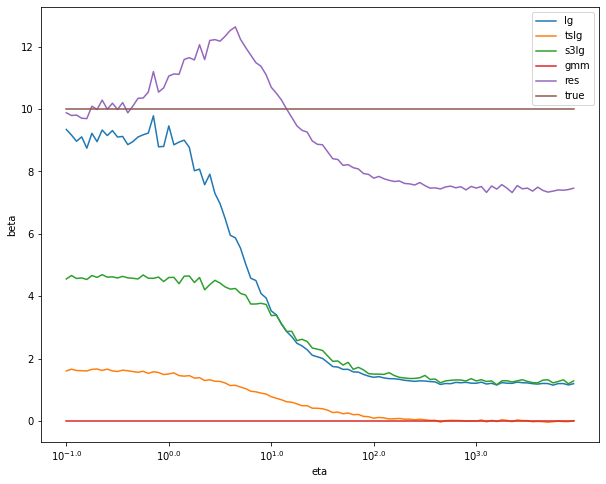

In [3]:
k = np.linspace(-1, 4, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])
gmm_coef = np.array([])
res_coef = np.array([])
beta = 10

for eta in np.power(10, k):
    data = sim_data(n=10000, eta=eta, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    s3lg = three_stage_logit()
    s3lg.fit(data.X, data.Y, data.Z)
    s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    gmm = GMM_logit()
    gmm.fit(data.X, data.Y, data.Z)
    gmm_coef = np.append(gmm_coef, gmm.coef_)
    
    res_model = residual_logit()
    res_model.fit(data.X, data.Y, data.Z)
    res_coef = np.append(res_coef, res_model.beta)
    
plt.figure(figsize=(10, 8))
plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
plt.plot(k, s3lg_coef, label='s3lg')
plt.plot(k, gmm_coef, label='gmm')
plt.plot(k, res_coef, label='res')
plt.plot(k, beta * np.ones(100), label='true')
plt.xticks(k[::20], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::20]])
plt.xlabel('eta')
plt.ylabel('beta')
plt.legend()

/var/folders/5z/8hzvmhln5p36t4tdqc9c52z40000gn/T/ipykernel_55739/3049867263.py:5: RuntimeWarning: overflow encountered in power
  for eta in np.power(10, k):


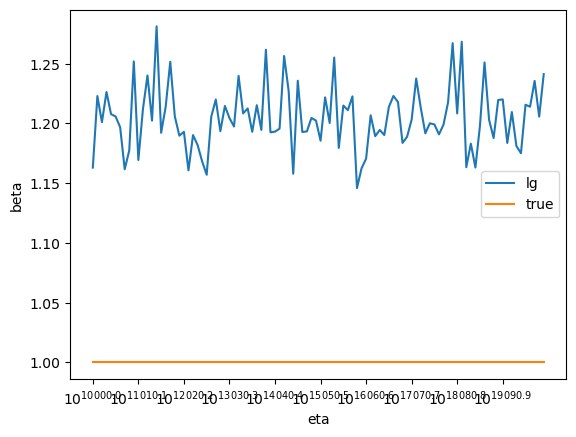

In [3]:
k = np.linspace(10000, 20000, 100)
lg_coef = np.array([])
beta=1

for eta in np.power(10, k):
    data = sim_data(n=10000, eta=eta, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)

plt.plot(k, lg_coef, label='lg')
plt.plot(k, beta * np.ones(100), label='true')
plt.xticks(k[::10], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::10]])
plt.xlabel('eta')
plt.ylabel('beta')
plt.legend()

### The effect pf $\gamma$

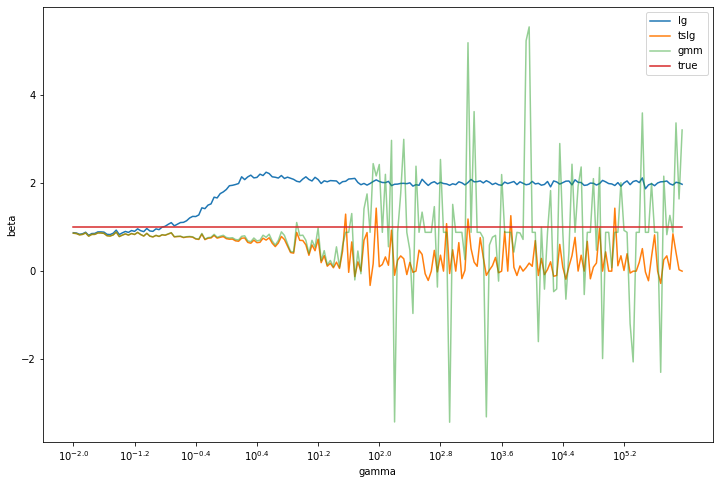

In [10]:
k = np.linspace(-2, 6, 200)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])      
gmm_coef = np.array([])
beta = 1

for gamma in np.power(10, k):
    data = sim_data(n=10000, gamma=gamma, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    # s3lg = three_stage_logit()
    # s3lg.fit(data.X, data.Y, data.Z)
    # s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    gmm = GMM_logit()
    gmm.fit(data.X, data.Y, data.Z)
    gmm_coef = np.append(gmm_coef, gmm.coef_)
    
    
# Detect outliers of gmm_coef and substitute them with the mean of other values
outliers = np.abs(gmm_coef - beta) > 5
gmm_coef[outliers] = np.mean(gmm_coef[~outliers])

plt.figure(figsize=(12, 8))
plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
#plt.plot(k, s3lg_coef, label='s3lg')
plt.plot(k, gmm_coef, label = 'gmm', alpha=0.5)
plt.plot(k, beta * np.ones(200), label='true')
plt.xticks(k[::20], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::20]])
plt.xlabel('gamma')
plt.ylabel('beta')
plt.legend()

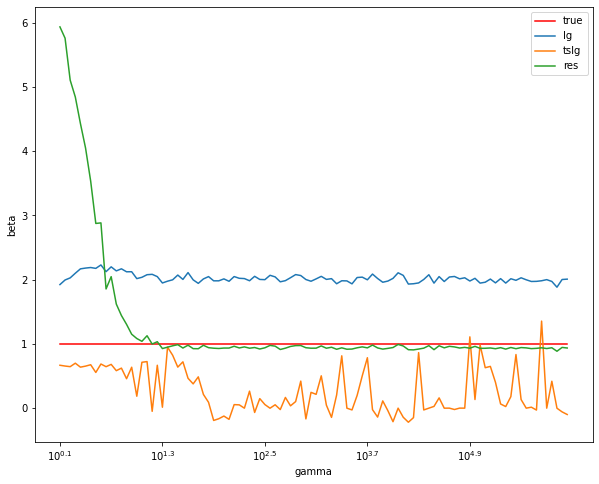

In [13]:
k = np.linspace(0.1, 6, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])      
gmm_coef = np.array([])
res_coef = np.array([])
beta = 1

for gamma in np.power(10, k):
    data = sim_data(n=10000, gamma=gamma, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    # s3lg = three_stage_logit()
    # s3lg.fit(data.X, data.Y, data.Z)
    # s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    res_model = residual_logit()
    res_model.fit(data.X, data.Y, data.Z)
    res_coef = np.append(res_coef, res_model.beta)
    
    # gmm = GMM_logit()
    # gmm.fit(data.X, data.Y, data.Z)
    # gmm_coef = np.append(gmm_coef, gmm.coef_)
    
plt.figure(figsize=(10, 8))
plt.plot(k, beta * np.ones(100), label='true', color='red')
plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
#plt.plot(k, s3lg_coef, label='s3lg')
plt.plot(k, res_coef, label='res')
# plt.plot(k, gmm_coef, label = 'gmm')

plt.xticks(k[::20], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::20]])
plt.xlabel('gamma')
plt.ylabel('beta')
plt.legend()

In [14]:
para_range = np.linspace(-5, 5, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])
gmm_coef = np.array([])
res_coef = np.array([])
beta = 1

for gamma in para_range:
        
        data = sim_data(n=10000, gamma=gamma, beta=beta)
        
        lg = LogisticRegression()
        lg.fit(data.X.reshape(-1, 1), data.Y)
        lg_coef = np.append(lg_coef, lg.coef_)
        
        tslg = two_stage_logit()
        tslg.fit(data.X, data.Y, data.Z)
        tslg_coef = np.append(tslg_coef, tslg.coef_)
        
        # s3lg = three_stage_logit()
        # s3lg.fit(data.X, data.Y, data.Z)
        # s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
        
        # gmm = GMM_logit()
        # gmm.fit(data.X, data.Y, data.Z)
        # gmm_coef = np.append(gmm_coef, gmm.coef_)
        
        res_model = residual_logit()
        res_model.fit(data.X, data.Y, data.Z)
        res_coef = np.append(res_coef, res_model.beta)
        


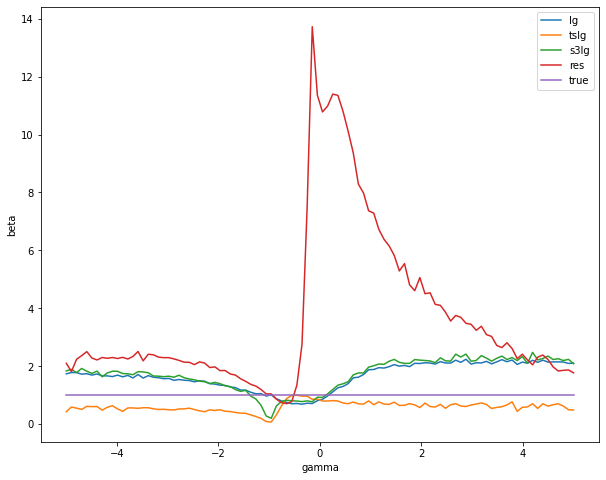

In [15]:
plt.figure(figsize=(10, 8))        
plt.plot(para_range, lg_coef, label='lg')
plt.plot(para_range, tslg_coef, label='tslg')
plt.plot(para_range, s3lg_coef, label='s3lg')
# plt.plot(para_range, gmm_coef, label='gmm')
plt.plot(para_range, res_coef, label='res')
plt.plot(para_range, beta * np.ones(100), label='true')
plt.xlabel('gamma')
plt.ylabel('beta')
plt.legend()


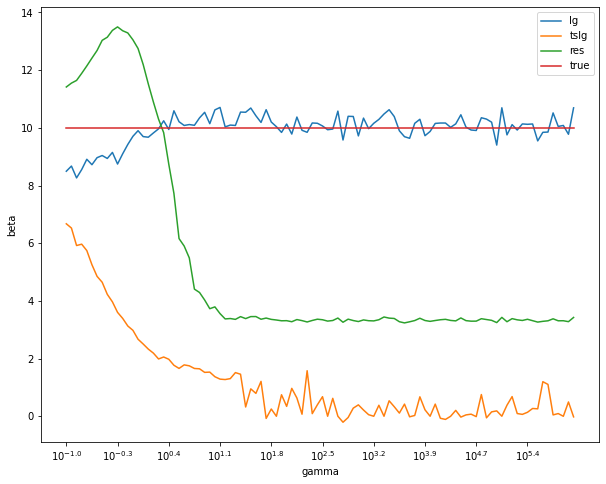

In [18]:
k = np.linspace(-1, 6, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])      
gmm_coef = np.array([])
res_coef = np.array([])
beta = 10

for gamma in np.power(10, k):
    data = sim_data(n=10000, gamma=gamma, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    res_model = residual_logit()
    res_model.fit(data.X, data.Y, data.Z)
    res_coef = np.append(res_coef, res_model.beta)
    
    
    # s3lg = three_stage_logit()
    # s3lg.fit(data.X, data.Y, data.Z)
    # s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    # gmm = GMM_logit()
    # gmm.fit(data.X, data.Y, data.Z)
    # gmm_coef = np.append(gmm_coef, gmm.coef_)
    
plt.figure(figsize=(10, 8))
plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
plt.plot(k, res_coef, label='res')
#plt.plot(k, s3lg_coef, label='s3lg')
# plt.plot(k, gmm_coef, label = 'gmm')
plt.plot(k, beta * np.ones(100), label='true')
plt.xticks(k[::10], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::10]])
plt.xlabel('gamma')
plt.ylabel('beta')
plt.legend()

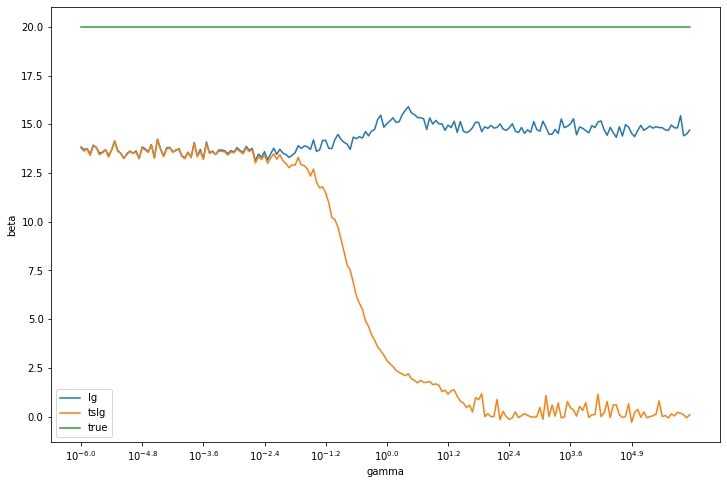

In [20]:
k = np.linspace(-6, 6, 200)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])      
gmm_coef = np.array([])
beta = 20

for gamma in np.power(10, k):
    data = sim_data(n=10000, gamma=gamma, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    # s3lg = three_stage_logit()
    # s3lg.fit(data.X, data.Y, data.Z)
    # s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    # gmm = GMM_logit()
    # gmm.fit(data.X, data.Y, data.Z)
    # gmm_coef = np.append(gmm_coef, gmm.coef_)
    
plt.figure(figsize=(12, 8))
plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
#plt.plot(k, s3lg_coef, label='s3lg')
# plt.plot(k, gmm_coef, label = 'gmm')
plt.plot(k, beta * np.ones(200), label='true')
plt.xticks(k[::20], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::20]])
plt.xlabel('gamma')
plt.ylabel('beta')
plt.legend()

### effect of alpha

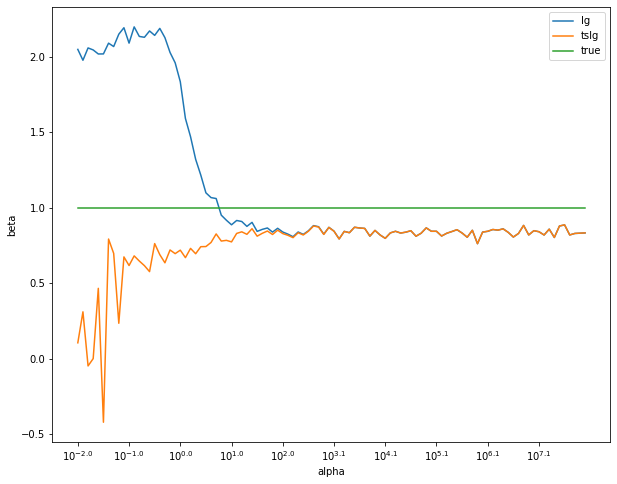

In [21]:
k = np.linspace(-2, 8, 100)
lg_coef = np.array([])
tslg_coef = np.array([])
s3lg_coef = np.array([])
gmm_coef = np.array([])

beta = 1

for alpha in np.power(10, k):
    data = sim_data(n=10000, alpha=alpha, beta=beta)
    
    lg = LogisticRegression()
    lg.fit(data.X.reshape(-1, 1), data.Y)
    lg_coef = np.append(lg_coef, lg.coef_)
    
    tslg = two_stage_logit()
    tslg.fit(data.X, data.Y, data.Z)
    tslg_coef = np.append(tslg_coef, tslg.coef_)
    
    # s3lg = three_stage_logit()
    # s3lg.fit(data.X, data.Y, data.Z)
    # s3lg_coef = np.append(s3lg_coef, s3lg.coef_)
    
    # gmm = GMM_logit()
    # gmm.fit(data.X, data.Y, data.Z)
    # gmm_coef = np.append(gmm_coef, gmm.coef_)
    
plt.figure(figsize=(10, 8))
plt.plot(k, lg_coef, label='lg')
plt.plot(k, tslg_coef, label='tslg')
#plt.plot(k, s3lg_coef, label='s3lg')
#plt.plot(k, gmm_coef, label='gmm')
plt.plot(k, beta * np.ones(100), label='true')
plt.xticks(k[::10], [f'$10^{{{round(ki, 1)}}}$' for ki in k[::10]])
plt.xlabel('alpha')
plt.ylabel('beta')
plt.legend()